In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.patches import Patch
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Part 1: Without Clustering Data

In [2]:
#get the data sets
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
#drop the empty column at the beginning
train_df = train_df.drop('Unnamed: 0',axis = 1)
test_df = test_df.drop('Unnamed: 0',axis = 1)

In [4]:
#make the categorical columns into numeric
train_df_encoded = pd.get_dummies(train_df, columns=['language',	'emotion',	'gender'])
test_df_encoded = pd.get_dummies(test_df, columns=['language',	'emotion',	'gender'])


In [5]:
#remove unneeded columns and set y column
columns = [column for column in train_df_encoded.columns if 'file_name' != column and 'duration' != column and 'emotion_' not in column ]
pred_column = 'emotion_SAD'


In [6]:
#In case we want to try the model on a new language, we need to remove language as a feature for modeling as we wouldn't know the "correction factor" forthat language ahead of time.
droplist_incllang= ['file_name']+[column for column in train_df_encoded.columns if 'emotion_' in column]+[column for column in train_df_encoded.columns if 'language_' in column]

In [7]:
#Separate out the prediction column. Remove the text column (can't standardize text) as well as the coded emotions.
droplist_base= ['file_name']+[column for column in train_df_encoded.columns if 'emotion_' in column]

Xtrain = train_df_encoded.drop(droplist_base, axis=1)
Ytrain = train_df_encoded[pred_column]

Xtest = test_df_encoded.drop(droplist_base,  axis=1)
Ytest = test_df_encoded[pred_column]

#Scale the predictors
scaler = StandardScaler()
Xtrain_scaled_array = scaler.fit_transform(Xtrain)
Xtest_scaled_array = scaler.fit_transform(Xtest)

#Put them back into a dataframe for use
Xtrain_scaled = pd.DataFrame(Xtrain_scaled_array, columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(Xtest_scaled_array, columns=Xtest.columns)

Logistic Regression

In [8]:
#set up scoring function
scorer = make_scorer(average_precision_score, needs_proba=True)

# Define the model
model = LogisticRegression(penalty='l1', random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#Find the estimators
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, verbose=5)


In [9]:
grid_search.fit(Xtrain_scaled, Ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.931 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.924 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.895 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.942 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.939 total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.931 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.917 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.887 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.940 total time=   1.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.933 total time=   0.9s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.965 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.967 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.970 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.978 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.979 total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.959 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.955 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.966 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.975 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.972 total time=   1.1s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.917 total time=   0.3s
[CV 2/5] END .............C=1, solver=liblinear;, score=0.926 total time=   0.3s
[CV 3/5] END .............C=1, solver=liblinear;, score=0.928 total time=   0.4s
[CV 4/5] END .............C=1, solver=liblinear;, score=0.960 total time=   0.3s
[CV 5/5] END .............C=1, solver=liblinear;, score=0.956 total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.937 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.933 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.958 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.968 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.966 total time=   1.1s
[CV 1/5] END ............C=10, solver=liblinear;, score=0.892 total time=   0.9s
[CV 2/5] END ............C=10, solver=liblinear;, score=0.876 total time=   2.4s
[CV 3/5] END ............C=10, solver=liblinear;, score=0.833 total time=   1.3s
[CV 4/5] END ............C=10, solver=liblinear;, score=0.904 total time=   3.4s
[CV 5/5] END ............C=10, solver=liblinear;, score=0.919 total time=   2.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.936 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.930 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.956 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.966 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.964 total time=   1.1s
[CV 1/5] END ...........C=100, solver=liblinear;, score=0.893 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=liblinear;, score=0.822 total time= 2.0min


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=liblinear;, score=0.871 total time= 2.0min
[CV 4/5] END ...........C=100, solver=liblinear;, score=0.899 total time=   1.5s
[CV 5/5] END ...........C=100, solver=liblinear;, score=0.904 total time=   1.8s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.936 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.930 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.956 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.965 total time=   1.1s
[CV 5/5] END ................C=100, solver=saga;, score=0.964 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(average_precision_score, needs_proba=True),
             verbose=5)

In [10]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score: 0.97


In [11]:
best_model = grid_search.best_estimator_

In [12]:
# Predict test data
y_pred = best_model.predict(Xtest_scaled)

# Evaluate the model
print("Test Accuracy:", accuracy_score(Ytest, y_pred))
print("Classification Report:\n", classification_report(Ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Ytest, y_pred))

Test Accuracy: 0.951417004048583
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.96      0.96       167
        True       0.93      0.93      0.93        80

    accuracy                           0.95       247
   macro avg       0.94      0.94      0.94       247
weighted avg       0.95      0.95      0.95       247

Confusion Matrix:
 [[161   6]
 [  6  74]]


In [13]:
y_pred_prob = best_model.predict_proba(Xtest_scaled)

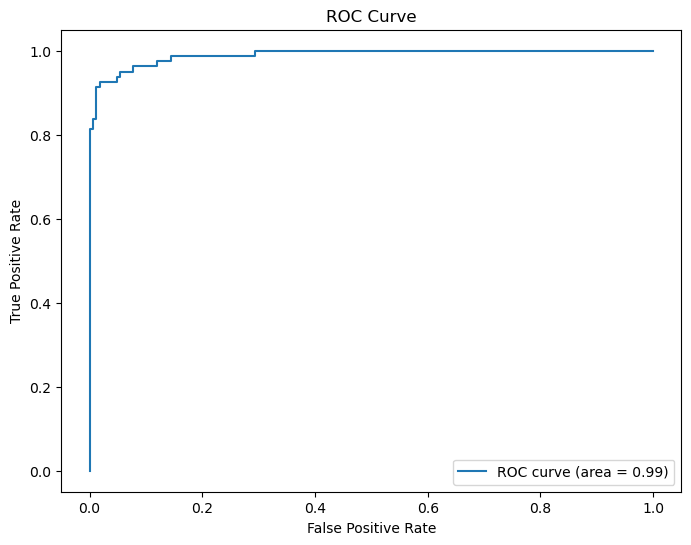

In [14]:
#Make ROC Curve
fpr, tpr, thresholds = roc_curve(Ytest, y_pred_prob[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(test_df_encoded[pred_column], y_pred_prob[:, 1]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [15]:
#Find features with non-0 betas

#get full list of features and their coefficients
features = Xtest_scaled.columns
coefficients = best_model.coef_.flatten()
fulllist= pd.DataFrame(np.transpose([features, coefficients]))
#remove rows with 0 as a coefficient
shortlist = fulllist[fulllist[1] != 0]
#show how many features were not kicked out of the model:
print(len(shortlist))

92


In [16]:
#sort and plot the coefficients
coef_sorted = shortlist.reindex(shortlist[1].abs().sort_values(ascending=False).index)
coef_sorted['Abs_Coef'] = coef_sorted[1].abs()
coef_sorted

,0,1,Abs_Coef
621,language_EST,-1.135679,1.135679
20,mfccs_mean_0,-0.991607,0.991607
35,mfccs_std_2,-0.919511,0.919511
622,language_FRE,0.798111,0.798111
22,mfccs_mean_2,0.778674,0.778674
...,...,...,...
423,f0_short_1_grad,0.005404,0.005404
358,med_amp_short_1_diff,-0.003023,0.003023
405,bw_short_0_grad,-0.00221,0.00221
390,minf_items_short_1_diff,0.000768,0.000768


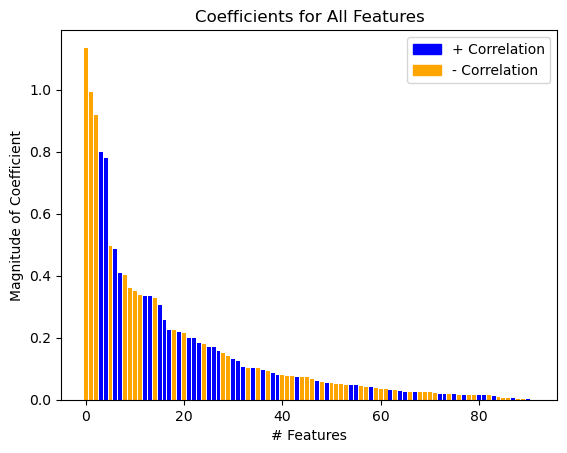

In [17]:
#look at all of them to get their distribution
colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted[1]]
plt.bar(range(len(coef_sorted[0])), coef_sorted['Abs_Coef'], color=colors)
#plt.bar(coef_sorted[0], coef_sorted['Abs_Coef'], color=colors)
plt.xlabel('# Features')
plt.ylabel('Magnitude of Coefficient')
plt.title('Coefficients for All Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

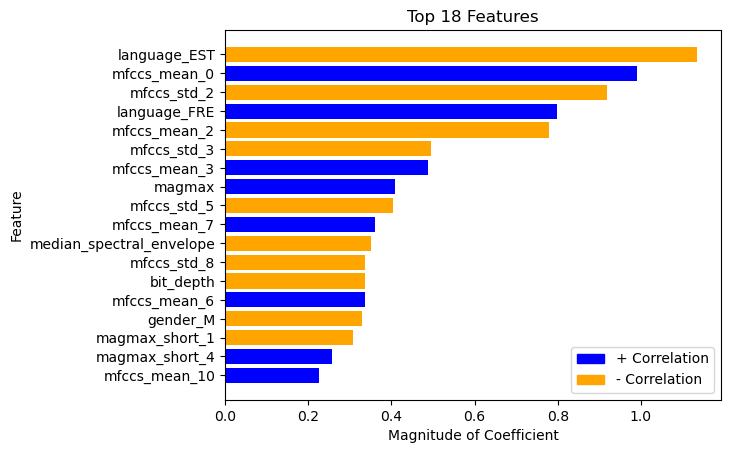

In [18]:
#look at just the top few of them to get their distribution
numtop = 18
#reverses the order
coef_sorted = coef_sorted.iloc[::-1]

colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted[1]]
plt.barh(coef_sorted[0][-numtop:], coef_sorted['Abs_Coef'][-numtop:], color=colors)

plt.ylabel('Feature')
plt.xlabel('Magnitude of Coefficient')
plt.title('Top ' + str(numtop) + ' Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

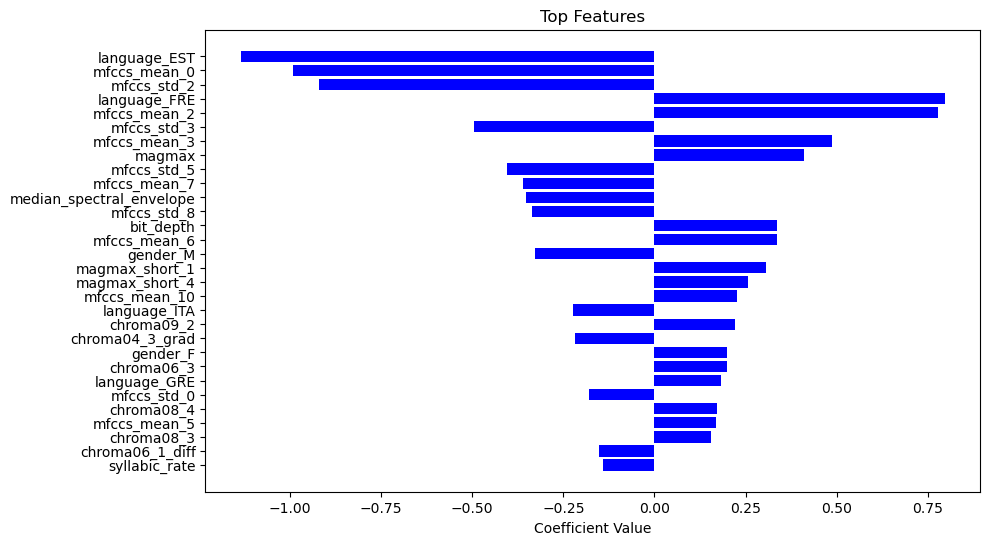

In [19]:
indices = np.argsort(np.abs(coefficients))[-30:]

plt.figure(figsize=(10, 6))
plt.title('Top Features')
plt.barh(range(len(indices)), coefficients[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Coefficient Value')
plt.show()

In [20]:
# Confusion Matrix
cm = confusion_matrix(Ytest, y_pred)
cm

array([[161,   6],
       [  6,  74]], dtype=int64)

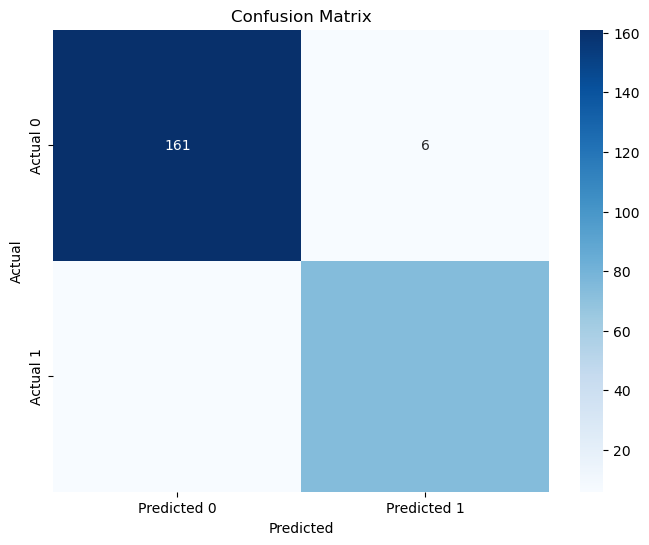

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Part 2: With Clustering Data

In [23]:
#get the data sets
train_df_wc = pd.read_csv('train_set_wc.csv')
test_df_wc = pd.read_csv('test_set_wc.csv')
#drop the empty column at the beginning
train_df_wc = train_df_wc.drop('Unnamed: 0',axis = 1)
test_df_wc = test_df_wc.drop('Unnamed: 0',axis = 1)
#make the categorical columns into numeric
train_df_encoded_wc = pd.get_dummies(train_df_wc, columns=['language',	'emotion',	'gender', 'kmeans_wlang_elbow', 'kmeans_wolang_elbow', 'kmeans_wlang_sil', 'kmeans_wolang_sil', 'cluster_by_hierarcal', 'cluster_by_hierarcal_2_features'])
test_df_encoded_wc = pd.get_dummies(test_df_wc, columns=['language',	'emotion',	'gender', 'kmeans_wlang_elbow', 'kmeans_wolang_elbow', 'kmeans_wlang_sil', 'kmeans_wolang_sil', 'cluster_by_hierarcal', 'cluster_by_hierarcal_2_features'])
#remove unneeded columns and set y column
columns = [column for column in train_df_encoded_wc.columns if 'file_name' != column and 'duration' != column and 'emotion_' not in column ]
pred_column = 'emotion_SAD'


In [24]:
#Separate out the prediction column. Remove the text column (can't standardize text) as well as the coded emotions.
droplist_base= ['file_name']+[column for column in train_df_encoded_wc.columns if 'emotion_' in column]

Xtrain_wc = train_df_encoded_wc.drop(droplist_base, axis=1)
Ytrain_wc = train_df_encoded_wc[pred_column] #this should be the same as without clusters, but just to be thorough...

Xtest_wc = test_df_encoded_wc.drop(droplist_base,  axis=1)
Ytest_wc = test_df_encoded_wc[pred_column]

#Scale the predictors
scaler = StandardScaler()
Xtrain_scaled_array_wc = scaler.fit_transform(Xtrain_wc)
Xtest_scaled_array_wc = scaler.fit_transform(Xtest_wc)

#Put them back into a dataframe for use
Xtrain_scaled_wc = pd.DataFrame(Xtrain_scaled_array_wc, columns=Xtrain_wc.columns)
Xtest_scaled_wc = pd.DataFrame(Xtest_scaled_array_wc, columns=Xtest_wc.columns)

print(Xtrain_scaled_wc.iloc[0, 625:661])

language_ITA                        -0.307089
gender_F                            -1.163733
gender_M                             1.163733
kmeans_wlang_elbow_0                -0.308791
kmeans_wlang_elbow_1                -0.435185
kmeans_wlang_elbow_2                -0.566237
kmeans_wlang_elbow_3                -0.417270
kmeans_wlang_elbow_4                -0.612065
kmeans_wlang_elbow_5                 3.177591
kmeans_wolang_elbow_0               -0.430198
kmeans_wolang_elbow_1               -0.539255
kmeans_wolang_elbow_2                3.311886
kmeans_wolang_elbow_3               -0.433762
kmeans_wolang_elbow_4               -0.354336
kmeans_wolang_elbow_5               -0.291470
kmeans_wolang_elbow_6               -0.479263
kmeans_wlang_sil_0                  -1.034723
kmeans_wlang_sil_1                   1.034723
kmeans_wolang_sil_0                 -1.028400
kmeans_wolang_sil_1                  1.028400
cluster_by_hierarcal_0              -0.660250
cluster_by_hierarcal_1            

Logistic Regression

In [25]:
#use same scorer and modeling stuff as above, just new data
grid_search.fit(Xtrain_scaled_wc, Ytrain_wc)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
best_model_wc = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..........C=0.01, solver=liblinear;, score=0.935 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.928 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=liblinear;, score=0.919 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=liblinear;, score=0.947 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=liblinear;, score=0.950 total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...............C=0.01, solver=saga;, score=0.937 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...............C=0.01, solver=saga;, score=0.929 total time=   1.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...............C=0.01, solver=saga;, score=0.918 total time=   1.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...............C=0.01, solver=saga;, score=0.947 total time=   0.9s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...............C=0.01, solver=saga;, score=0.950 total time=   1.0s
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.952 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.965 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.971 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.977 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.981 total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=0.1, solver=saga;, score=0.959 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=0.1, solver=saga;, score=0.957 total time=   1.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=0.1, solver=saga;, score=0.966 total time=   1.0s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=0.1, solver=saga;, score=0.976 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ................C=0.1, solver=saga;, score=0.974 total time=   1.1s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.923 total time=   0.3s
[CV 2/5] END .............C=1, solver=liblinear;, score=0.935 total time=   0.3s
[CV 3/5] END .............C=1, solver=liblinear;, score=0.927 total time=   0.3s
[CV 4/5] END .............C=1, solver=liblinear;, score=0.960 total time=   0.3s
[CV 5/5] END .............C=1, solver=liblinear;, score=0.952 total time=   0.4s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..................C=1, solver=saga;, score=0.938 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..................C=1, solver=saga;, score=0.944 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..................C=1, solver=saga;, score=0.957 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..................C=1, solver=saga;, score=0.969 total time=   1.1s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..................C=1, solver=saga;, score=0.970 total time=   1.1s
[CV 1/5] END ............C=10, solver=liblinear;, score=0.900 total time=   0.9s
[CV 2/5] END ............C=10, solver=liblinear;, score=0.885 total time=   1.2s
[CV 3/5] END ............C=10, solver=liblinear;, score=0.836 total time=   0.8s
[CV 4/5] END ............C=10, solver=liblinear;, score=0.926 total time=   1.4s
[CV 5/5] END ............C=10, solver=liblinear;, score=0.924 total time=   1.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .................C=10, solver=saga;, score=0.937 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .................C=10, solver=saga;, score=0.940 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .................C=10, solver=saga;, score=0.955 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .................C=10, solver=saga;, score=0.967 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .................C=10, solver=saga;, score=0.969 total time=   1.2s
[CV 1/5] END ...........C=100, solver=liblinear;, score=0.902 total time=   0.8s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...........C=100, solver=liblinear;, score=0.838 total time= 2.2min


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...........C=100, solver=liblinear;, score=0.881 total time= 2.1min


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...........C=100, solver=liblinear;, score=0.889 total time= 2.1min


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...........C=100, solver=liblinear;, score=0.885 total time= 2.1min


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ................C=100, solver=saga;, score=0.937 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ................C=100, solver=saga;, score=0.939 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ................C=100, solver=saga;, score=0.954 total time=   1.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ................C=100, solver=saga;, score=0.966 total time=   1.2s
[CV 5/5] END ................C=100, solver=saga;, score=0.969 total time=   1.2s
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation score: 0.97


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
# Predict test data
y_pred_wc = best_model_wc.predict(Xtest_scaled_wc)

# Evaluate the model
print("Test Accuracy:", accuracy_score(Ytest_wc, y_pred_wc))
print("Classification Report:\n", classification_report(Ytest_wc, y_pred_wc))
print("Confusion Matrix:\n", confusion_matrix(Ytest_wc, y_pred_wc))

Test Accuracy: 0.951417004048583
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.96      0.96       167
        True       0.93      0.93      0.93        80

    accuracy                           0.95       247
   macro avg       0.94      0.94      0.94       247
weighted avg       0.95      0.95      0.95       247

Confusion Matrix:
 [[161   6]
 [  6  74]]


In [27]:
y_pred_prob_wc = best_model_wc.predict_proba(Xtest_scaled_wc)

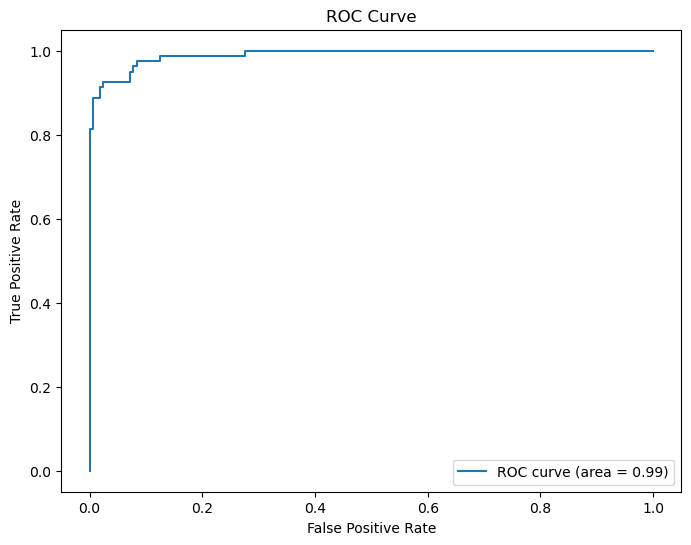

In [28]:
#Make ROC Curve
fpr_wc, tpr_wc, thresholds_wc = roc_curve(Ytest_wc, y_pred_prob_wc[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_wc, tpr_wc, label=f'ROC curve (area = {roc_auc_score(test_df_encoded_wc[pred_column], y_pred_prob_wc[:, 1]):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [29]:
#Find features with non-0 betas

#get full list of features and their coefficients
features_wc = Xtest_scaled_wc.columns
coefficients_wc = best_model_wc.coef_.flatten()
fulllist_wc= pd.DataFrame(np.transpose([features_wc, coefficients_wc]))
#remove rows with 0 as a coefficient
shortlist_wc = fulllist_wc[fulllist_wc[1] != 0]
#show how many features were not kicked out of the model:
print(len(shortlist_wc))

85


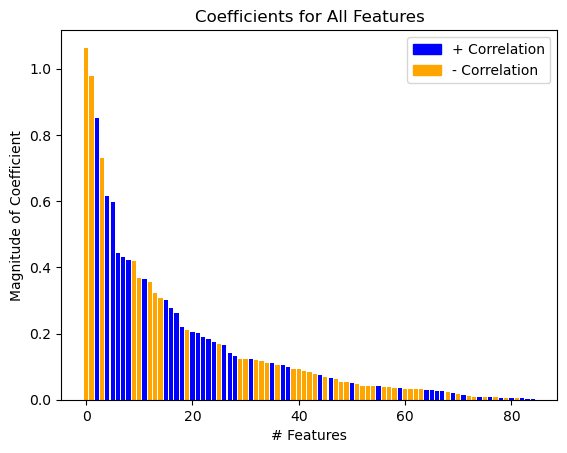

In [30]:
#sort and plot the coefficients
coef_sorted_wc = shortlist_wc.reindex(shortlist_wc[1].abs().sort_values(ascending=False).index)
coef_sorted_wc['Abs_Coef'] = coef_sorted_wc[1].abs()

#look at all of them to get their distribution
colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted_wc[1]]
plt.bar(range(len(coef_sorted_wc[0])), coef_sorted_wc['Abs_Coef'], color=colors)
#plt.bar(coef_sorted[0], coef_sorted['Abs_Coef'], color=colors)
plt.xlabel('# Features')
plt.ylabel('Magnitude of Coefficient')
plt.title('Coefficients for All Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

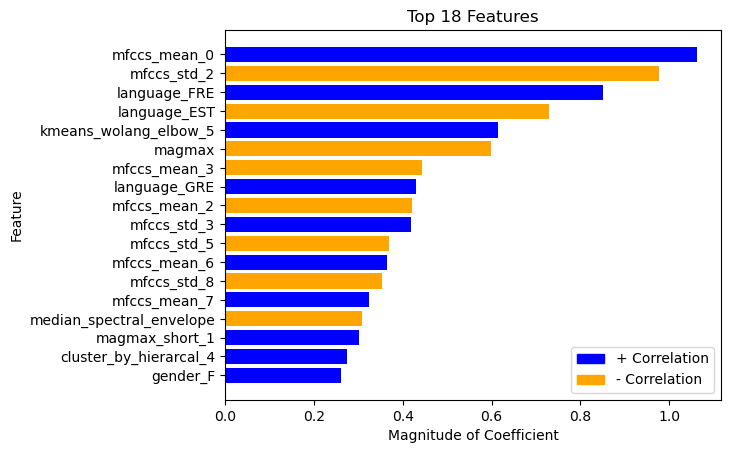

In [31]:
#look at just the top few of them to get their distribution
numtop = 18

#reverses the order
coef_sorted_wc = coef_sorted_wc.iloc[::-1]

colors = ['blue' if val >= 0 else 'orange' for val in coef_sorted_wc[1]]
plt.barh(coef_sorted_wc[0][-numtop:], coef_sorted_wc['Abs_Coef'][-numtop:], color=colors)

plt.ylabel('Feature')
plt.xlabel('Magnitude of Coefficient')
plt.title('Top ' + str(numtop) + ' Features')

legend_labels = [Patch(color='blue', label='+ Correlation'),
                 Patch(color='orange', label='- Correlation')]
plt.legend(handles=legend_labels)

plt.show()

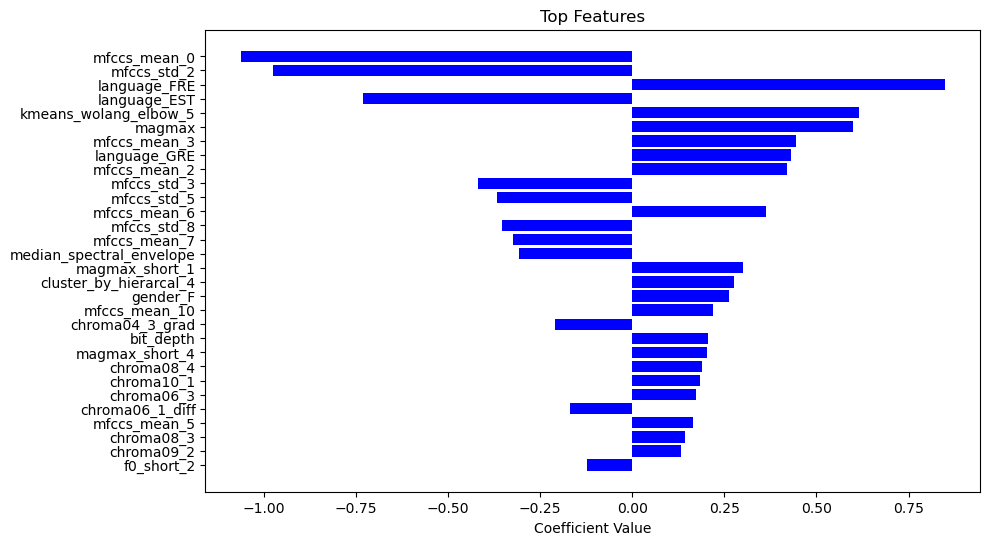

In [32]:
indices_wc = np.argsort(np.abs(coefficients_wc))[-30:]

plt.figure(figsize=(10, 6))
plt.title('Top Features')
plt.barh(range(len(indices_wc)), coefficients_wc[indices_wc], color='b', align='center')
plt.yticks(range(len(indices_wc)), [features_wc[i] for i in indices_wc])
plt.xlabel('Coefficient Value')
plt.show()

In [33]:
print(len(y_pred_wc))
print(len(Ytest_wc))

247
247


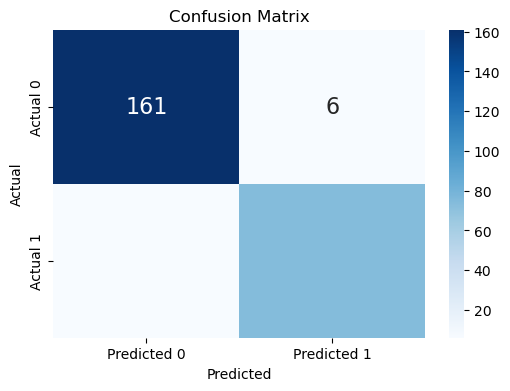

In [34]:
# Confusion Matrix
cm_wc = confusion_matrix(Ytest_wc, y_pred_wc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_wc, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot=True, fmt='d', annot_kws={"size": 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Comparing the 2:
The original data has .99 under the ROC curve. The data with clusters has .99.
The original test accuracy is .95. The data with clusters has 
The original data has 92 non-zero betas. The data with clusters has 85.
Hierarchical cluster #4 shows up as one of the top features.

In [35]:
print(cm)
print(cm_wc)

[[161   6]
 [  6  74]]
[[161   6]
 [  6  74]]
